### **EDA_Full**

In [208]:
# -----------------------------------
# Exploratory Data Analysis - Mall Customers Dataset
# -----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [209]:
# Load dataset
df = pd.read_csv("C:/Users/jaiso/Downloads/archive (1)/Mall_Customers.csv")

# -------------------------------
# 1. Dataset Overview
# -------------------------------
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Drop CustomerID (not useful for EDA)
df = df.drop("CustomerID", axis=1)

Shape of dataset: (200, 5)

Columns: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Data Types:
 CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

First 5 rows:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [210]:
# -------------------------------
# 2. Data Quality Checks
# -------------------------------
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())



Missing Values:
 Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Unique Values per Column:
 Genre                      2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64


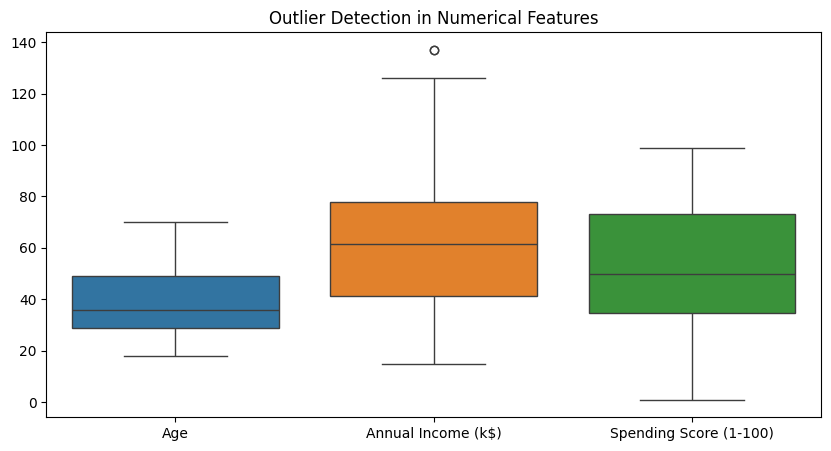

In [211]:
# Boxplots for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.title("Outlier Detection in Numerical Features")
plt.show()


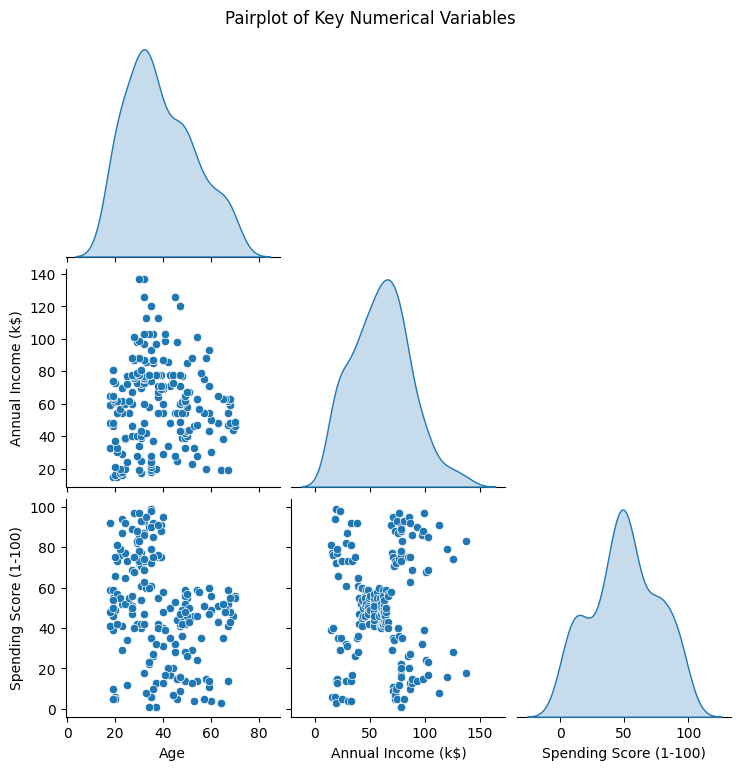

In [212]:
#Pairplot (Relationships Across All Variables)
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Key Numerical Variables", y=1.02)
plt.show()

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\1414555971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=df, palette="pastel")


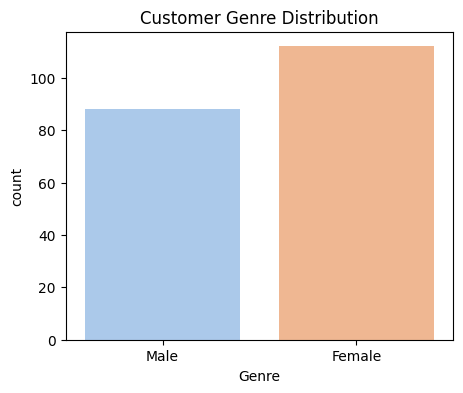


Genre Percentage:
 Genre
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [213]:
# -------------------------------
# 3. Genre Distribution
# -------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x="Genre", data=df, palette="pastel")
plt.title("Customer Genre Distribution")
plt.show()

print("\nGenre Percentage:\n", df['Genre'].value_counts(normalize=True)*100)

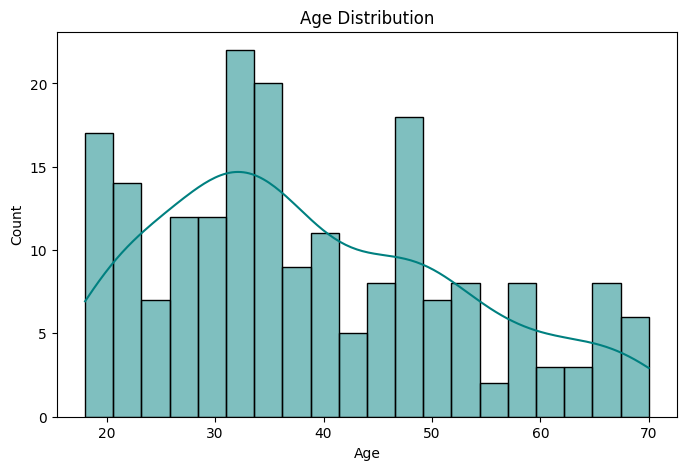


Age Group Counts:
 Age_Group
26-35    60
46-55    37
36-45    36
18-25    34
56-70    29
Name: count, dtype: int64


C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\3903855310.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age_Group", data=df, order=['18-25','26-35','36-45','46-55','56-70'], palette="Set2")


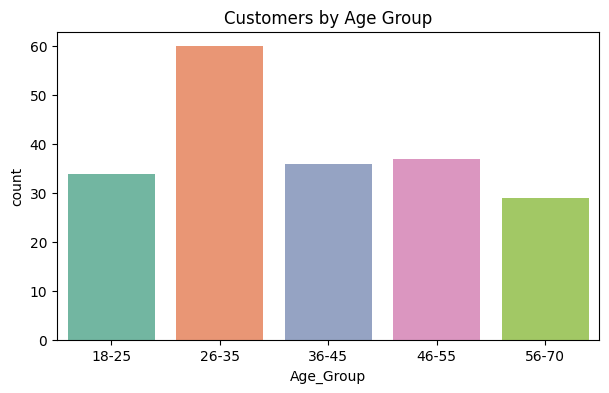

In [214]:
# -------------------------------
# 4. Age Analysis
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18,25,35,45,55,70],
                         labels=['18-25','26-35','36-45','46-55','56-70'])
print("\nAge Group Counts:\n", df['Age_Group'].value_counts())

plt.figure(figsize=(7,4))
sns.countplot(x="Age_Group", data=df, order=['18-25','26-35','36-45','46-55','56-70'], palette="Set2")
plt.title("Customers by Age Group")
plt.show()

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\1235607063.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Genre']=="Male"]['Annual Income (k$)'], label="Male", shade=True)
C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\1235607063.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Genre']=="Female"]['Annual Income (k$)'], label="Female", shade=True)


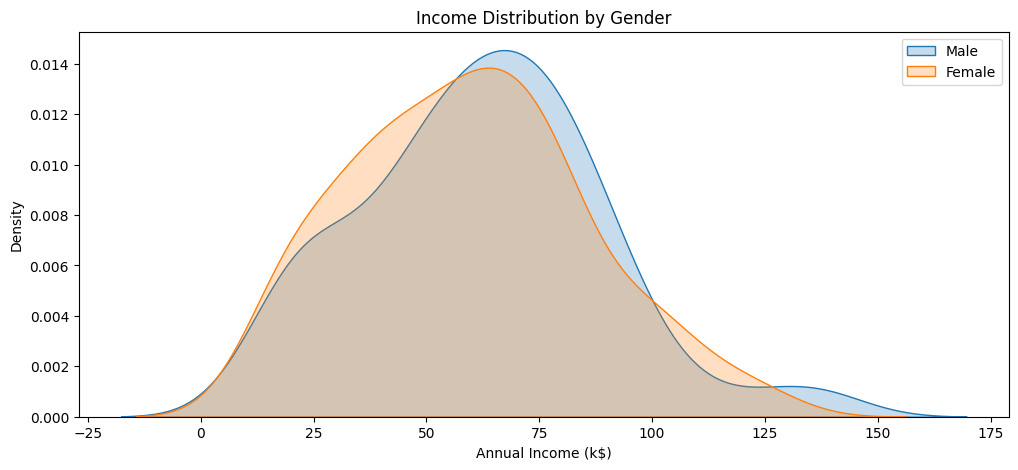

In [215]:
#Genre-Specific Analysis
plt.figure(figsize=(12,5))
sns.kdeplot(df[df['Genre']=="Male"]['Annual Income (k$)'], label="Male", shade=True)
sns.kdeplot(df[df['Genre']=="Female"]['Annual Income (k$)'], label="Female", shade=True)
plt.title("Income Distribution by Gender")
plt.legend()
plt.show()


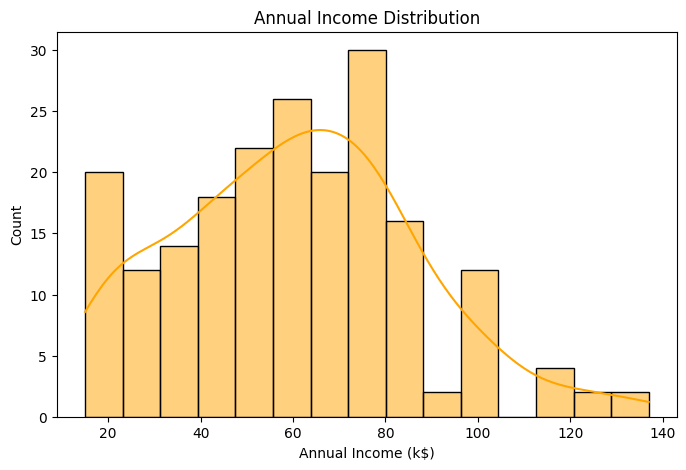


Income Group Counts:
 Income_Group
Medium    76
High      74
Low       50
Name: count, dtype: int64


In [216]:
# -------------------------------
# 5. Annual Income Analysis
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color="orange")
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.show()

# Income groups
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], bins=[0,40,70,150],
                            labels=['Low','Medium','High'])
print("\nIncome Group Counts:\n", df['Income_Group'].value_counts())

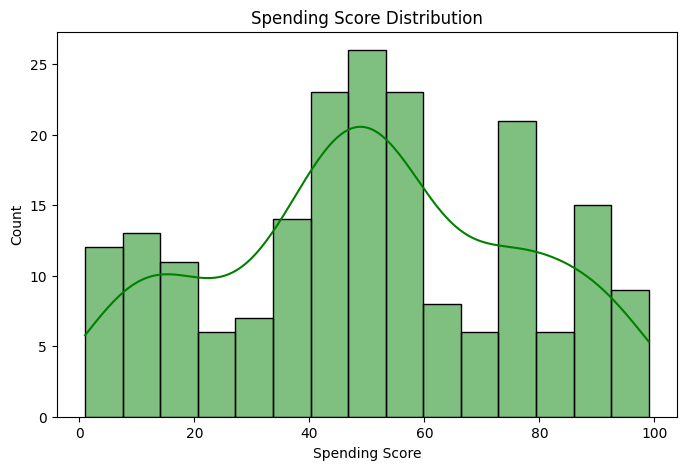


Spending Category Counts:
 Spending_Category
Medium    83
Low       63
High      54
Name: count, dtype: int64


In [217]:
# -------------------------------
# 6. Spending Score Analysis
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color="green")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.show()

# Spending categories
df['Spending_Category'] = pd.cut(df['Spending Score (1-100)'],
                                 bins=[0,40,70,100],
                                 labels=['Low','Medium','High'])
print("\nSpending Category Counts:\n", df['Spending_Category'].value_counts())

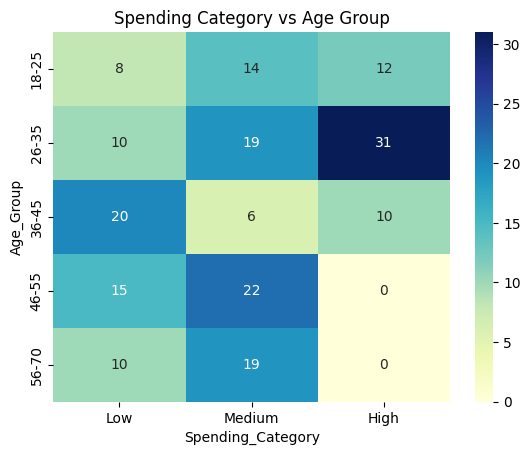

In [218]:
#Customer Segmentation Heatmaps (Cross Tabs)
heatmap_data = pd.crosstab(df['Age_Group'], df['Spending_Category'])
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Spending Category vs Age Group")
plt.show()


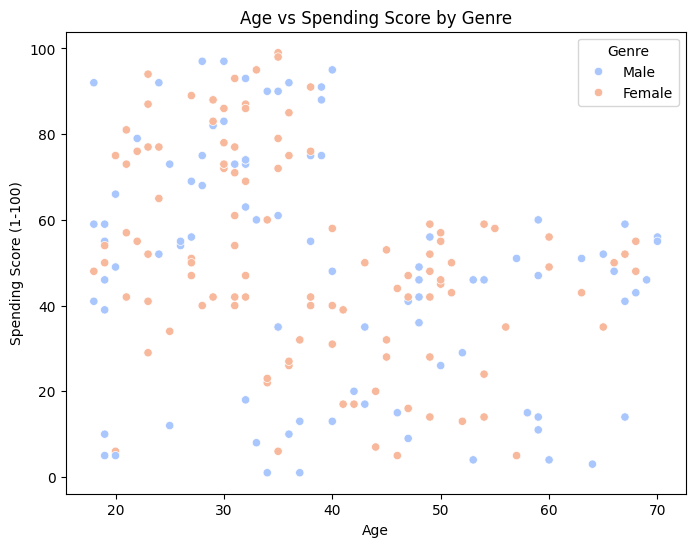

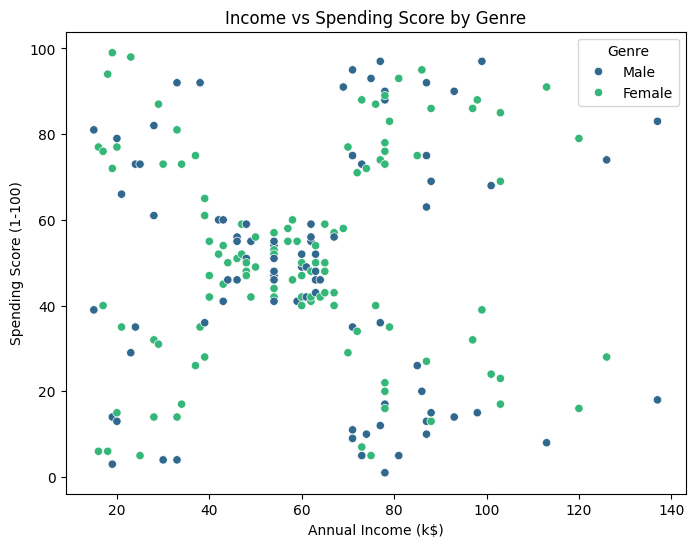

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\2260732923.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Annual Income (k$)", data=df, palette="pastel")


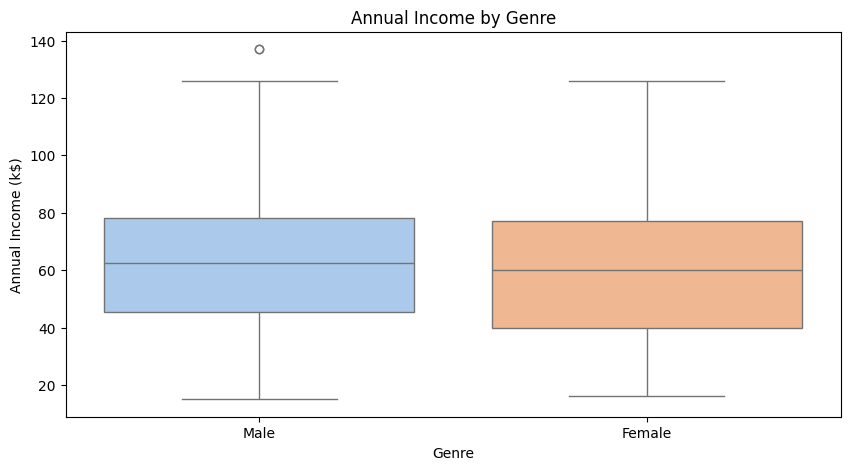

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\2260732923.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Spending Score (1-100)", data=df, palette="Set2")


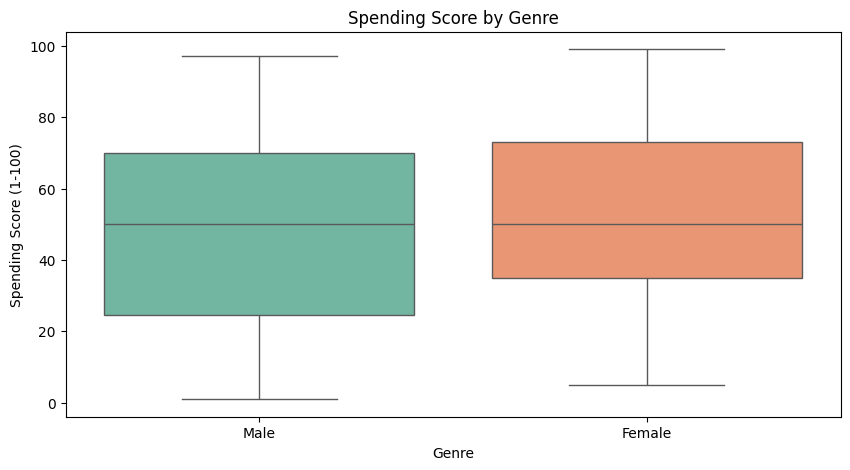

In [219]:
# -------------------------------
# 7. Bivariate Analysis
# -------------------------------

# Age vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df,
                hue="Genre", palette="coolwarm")
plt.title("Age vs Spending Score by Genre")
plt.show()

# Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",
                data=df, hue="Genre", palette="viridis")
plt.title("Income vs Spending Score by Genre")
plt.show()

# Boxplots
plt.figure(figsize=(10,5))
sns.boxplot(x="Genre", y="Annual Income (k$)", data=df, palette="pastel")
plt.title("Annual Income by Genre")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="Genre", y="Spending Score (1-100)", data=df, palette="Set2")
plt.title("Spending Score by Genre")
plt.show()

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\3387444343.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['Age_Group','Genre'])['Spending Score (1-100)'].mean().unstack()


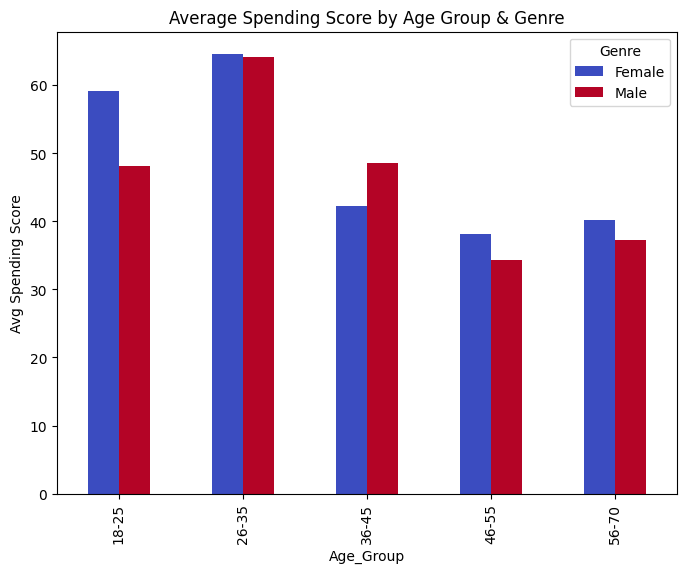

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\3387444343.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot2 = df.groupby(['Income_Group','Spending_Category']).size().unstack()


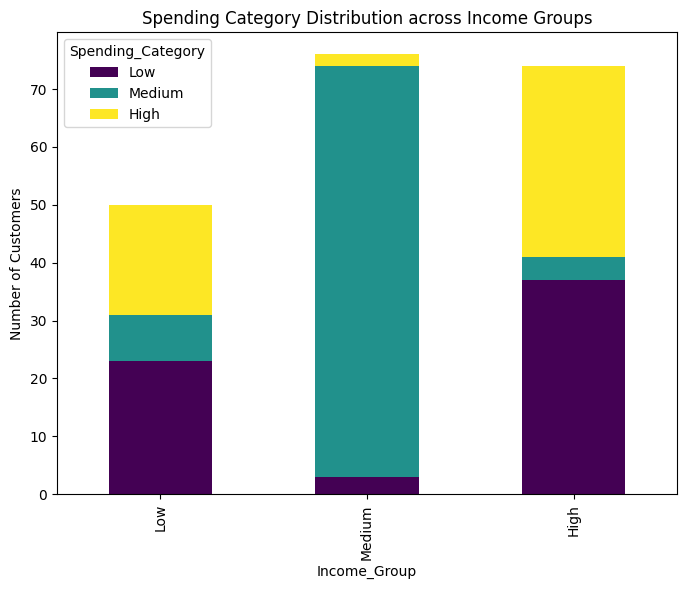

In [220]:
# -------------------------------
# 8. Multivariate Analysis
# -------------------------------

# Avg spending by Age Group & Genre
pivot = df.groupby(['Age_Group','Genre'])['Spending Score (1-100)'].mean().unstack()
pivot.plot(kind='bar', figsize=(8,6), colormap="coolwarm")
plt.title("Average Spending Score by Age Group & Genre")
plt.ylabel("Avg Spending Score")
plt.show()

# Spending category across income groups
pivot2 = df.groupby(['Income_Group','Spending_Category']).size().unstack()
pivot2.plot(kind='bar', stacked=True, figsize=(8,6), colormap="viridis")
plt.title("Spending Category Distribution across Income Groups")
plt.ylabel("Number of Customers")
plt.show()

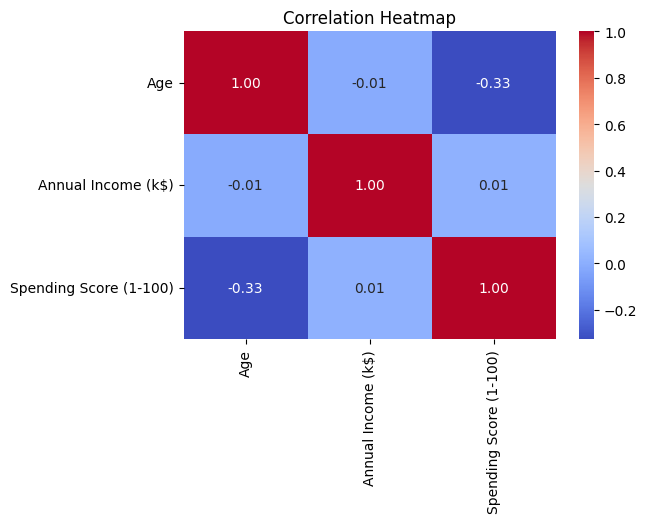

In [221]:
# -------------------------------
# 9. Correlation Analysis
# -------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [222]:
# -------------------------------
# 10. Statistical Tests
# -------------------------------
# T-test: Spending between male vs female
male_spending = df[df['Genre']=="Male"]['Spending Score (1-100)']
female_spending = df[df['Genre']=="Female"]['Spending Score (1-100)']
t_stat, p_val = ttest_ind(male_spending, female_spending)
print("\nT-test Gender Spending: t=%.2f, p=%.4f" % (t_stat, p_val))

# ANOVA: Spending across Age Groups
anova = f_oneway(*[group["Spending Score (1-100)"].values 
                   for name, group in df.groupby("Age_Group")])
print("ANOVA Age Groups Spending: F=%.2f, p=%.4f" % (anova.statistic, anova.pvalue))


T-test Gender Spending: t=-0.82, p=0.4137
ANOVA Age Groups Spending: F=11.06, p=0.0000


C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\300291398.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby("Age_Group")])


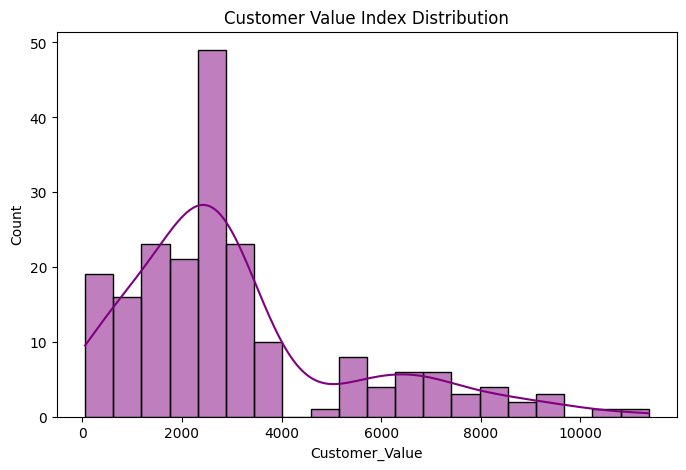


Top 5 High-Value Customers:
       Genre  Age  Annual Income (k$)  Spending Score (1-100)  Customer_Value
199    Male   30                 137                      83           11371
193  Female   38                 113                      91           10283
185    Male   30                  99                      97            9603
195  Female   35                 120                      79            9480
197    Male   32                 126                      74            9324


In [223]:
# -------------------------------
# 11. Derived Feature - Customer Value Index
# -------------------------------
df['Customer_Value'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']

plt.figure(figsize=(8,5))
sns.histplot(df['Customer_Value'], bins=20, kde=True, color="purple")
plt.title("Customer Value Index Distribution")
plt.show()

print("\nTop 5 High-Value Customers:\n",
      df[['Genre','Age','Annual Income (k$)','Spending Score (1-100)','Customer_Value']].sort_values(by="Customer_Value", ascending=False).head())

In [224]:
# -------------------------------
# 12. Final Insights
# -------------------------------
print("\n🔎 Key Insights from EDA:")
print("- Genre split is fairly balanced, slightly more females.")
print("- Most customers are in the 26-35 age group.")
print("- Annual Income is concentrated between 40k–70k.")
print("- Spending Score shows three clear segments: Low, Medium, High.")
print("- Younger customers (18–35) tend to have higher spending scores.")
print("- Some high-income customers spend very little → potential for targeted campaigns.")
print("- High Customer Value Index = High income + High spending = best target group.")



🔎 Key Insights from EDA:
- Genre split is fairly balanced, slightly more females.
- Most customers are in the 26-35 age group.
- Annual Income is concentrated between 40k–70k.
- Spending Score shows three clear segments: Low, Medium, High.
- Younger customers (18–35) tend to have higher spending scores.
- Some high-income customers spend very little → potential for targeted campaigns.
- High Customer Value Index = High income + High spending = best target group.


### **Data Science**

In [225]:
df['AgeGroup']=df['Age'].copy()

#### ANOVA

One-Way ANOVA → Spending & Income across Age Groups.

Tukey Post-hoc → Which age groups differ in Spending.

Two-Way ANOVA → Spending across AgeGroup + Gender (with & without interaction).

Two-Way ANOVA for Income → Gender & Age effects on Income.

Three-Way ANOVA → Spending influenced by AgeGroup × Gender × IncomeGroup.

Nested ANOVA → Income nested within AgeGroup by Gender.

Automated Insights → Tells you which tests show significant results.

##### One-Way ANOVA

In [226]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA
# -------------------------
# 1. One-Way ANOVA
# -------------------------

# Spending Score across Age Groups
model1 = ols('Q("Spending Score (1-100)") ~ C(AgeGroup)', data=df).fit()
anova1 = sm.stats.anova_lm(model1, typ=2)
print("\n--- One-Way ANOVA: Spending ~ AgeGroup ---")
print(anova1)
if anova1["PR(>F)"][0] < 0.05:
    print("✅ Insight: Spending Score differs significantly across Age Groups.")
else:
    print("❌ Insight: No significant difference in Spending Score across Age Groups.")

# Income across Age Groups
model2 = ols('Q("Annual Income (k$)") ~ C(AgeGroup)', data=df).fit()
anova2 = sm.stats.anova_lm(model2, typ=2)
print("\n--- One-Way ANOVA: Income ~ AgeGroup ---")
print(anova2)
if anova2["PR(>F)"][0] < 0.05:
    print("✅ Insight: Annual Income differs significantly across Age Groups.")
else:
    print("❌ Insight: No significant difference in Income across Age Groups.")

# Post-hoc for Spending ~ AgeGroup
tukey1 = pairwise_tukeyhsd(df['Spending Score (1-100)'], df['AgeGroup'])
print("\n--- Tukey Post-Hoc: Spending ~ AgeGroup ---")
print(tukey1)
# Extra: Simple interpretation from Tukey
print("\n--- Tukey Insights ---")
for res in tukey1.summary().data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = res
    if reject:  # only show significant differences
        print(f"✅ Significant difference in Spending between {group1} and {group2} "
              f"(mean diff={meandiff:.2f}, p={p_adj:.3f})")


--- One-Way ANOVA: Spending ~ AgeGroup ---
                   sum_sq     df         F   PR(>F)
C(AgeGroup)  59609.595635   50.0  2.430235  0.00002
Residual     73094.404365  149.0       NaN      NaN
✅ Insight: Spending Score differs significantly across Age Groups.

--- One-Way ANOVA: Income ~ AgeGroup ---
                  sum_sq     df         F    PR(>F)
C(AgeGroup)  44465.62816   50.0  1.427704  0.052855
Residual     92811.65184  149.0       NaN       NaN
❌ Insight: No significant difference in Income across Age Groups.


C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\810968786.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova1["PR(>F)"][0] < 0.05:
C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\810968786.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova2["PR(>F)"][0] < 0.05:



--- Tukey Post-Hoc: Spending ~ AgeGroup ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    18     19   -20.25    1.0  -75.7382  35.2382  False
    18     20    -19.8    1.0  -80.5842  40.9842  False
    18     21      6.8    1.0  -53.9842  67.5842  False
    18     22     10.0    1.0  -59.2059  79.2059  False
    18     23   3.3333    1.0  -55.1563   61.823  False
    18     24     11.5    1.0  -52.5722  75.5722  False
    18     25 -20.3333    1.0  -89.5392  48.8726  False
    18     26     -5.5    1.0  -83.9721  72.9721  False
    18     27   0.3333    1.0  -58.1563   58.823  False
    18     28     10.0    1.0  -54.0722  74.0722  False
    18     29     16.6    1.0  -44.1842  77.3842  False
    18     30  20.2857    1.0  -36.5082  77.0797  False
    18     31    3.875    1.0  -51.6132  59.3632  False
    18     32      6.0    1.0  -46.9059  58.9059  False
   

##### Two-Way ANOVA

In [227]:
# -------------------------
# 2. Two-Way ANOVA
# -------------------------

# Spending Score influenced by AgeGroup & Gender
model3 = ols('Q("Spending Score (1-100)") ~ C(AgeGroup) + C(Genre)', data=df).fit()
anova3 = sm.stats.anova_lm(model3, typ=2)
print("\n--- Two-Way ANOVA: Spending ~ AgeGroup + Gender ---")
print(anova3)
# Insights for main effects
if anova3.loc["C(AgeGroup)", "PR(>F)"] < 0.05:
    print("✅ Insight: Spending Score differs significantly across Age Groups.")
else:
    print("❌ Insight: No significant difference in Spending Score across Age Groups.")

# With Interaction
model4 = ols('Q("Spending Score (1-100)") ~ C(AgeGroup) * C(Genre)', data=df).fit()
anova4 = sm.stats.anova_lm(model4, typ=2)
print("\n--- Two-Way ANOVA (with Interaction): Spending ~ AgeGroup * Gender ---")
print(anova4)
if anova4.loc["C(AgeGroup):C(Genre)", "PR(>F)"] < 0.05:
    print("✅ Insight: Interaction effect is significant — AgeGroup and Gender together influence Spending differently.")
else:
    print("❌ Insight: No significant interaction — AgeGroup and Gender do not combine to affect Spending significantly.")


# Income influenced by AgeGroup & Gender
model5 = ols('Q("Annual Income (k$)") ~ C(AgeGroup) * C(Genre)', data=df).fit()
anova5 = sm.stats.anova_lm(model5, typ=2)
print("\n--- Two-Way ANOVA (with Interaction): Income ~ AgeGroup * Gender ---")
print(anova5)
if anova5.loc["C(AgeGroup)", "PR(>F)"] < 0.05:
    print("✅ Insight: Annual Income differs significantly across Age Groups.")
else:
    print("❌ Insight: No significant difference in Annual Income across Age Groups.")

if anova5.loc["C(Genre)", "PR(>F)"] < 0.05:
    print("✅ Insight: Annual Income differs significantly between Genders.")
else:
    print("❌ Insight: No significant difference in Annual Income between Genders.")

if anova5.loc["C(AgeGroup):C(Genre)", "PR(>F)"] < 0.05:
    print("✅ Insight: Interaction effect is significant — AgeGroup and Gender together influence Income differently.")
else:
    print("❌ Insight: No significant interaction — AgeGroup and Gender do not combine to affect Income significantly.")



--- Two-Way ANOVA: Spending ~ AgeGroup + Gender ---
                   sum_sq     df         F    PR(>F)
C(AgeGroup)  59164.296125   50.0  2.395984  0.000027
C(Genre)         2.792211    1.0  0.005654  0.940164
Residual     73091.612155  148.0       NaN       NaN
✅ Insight: Spending Score differs significantly across Age Groups.

--- Two-Way ANOVA (with Interaction): Spending ~ AgeGroup * Gender ---
                            sum_sq     df         F    PR(>F)
C(AgeGroup)           62466.372053   50.0  2.247769  0.000657
C(Genre)                  0.141324    1.0  0.000254  0.987306
C(AgeGroup):C(Genre)  22410.890028   50.0  0.806426  0.786414
Residual              62806.264286  113.0       NaN       NaN
❌ Insight: No significant interaction — AgeGroup and Gender do not combine to affect Spending significantly.

--- Two-Way ANOVA (with Interaction): Income ~ AgeGroup * Gender ---
                            sum_sq     df         F    PR(>F)
C(AgeGroup)           56576.792226   50.0  1.

c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 36
  warnings.warn('covariance of constraints does not have full '
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 43
  warnings.warn('covariance of constraints does not have full '
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 36
  warnings.warn('covariance of constraints does not have full '
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not 

##### Three-Way ANOVA

In [228]:
# -------------------------
# 3. Three-Way ANOVA
# -------------------------

# Spending influenced by AgeGroup, Gender & Income category
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=[15, 40, 70, 100, 137],
                           labels=["Low", "Medium", "High", "Very High"])

model6 = ols('Q("Spending Score (1-100)") ~ C(AgeGroup) * C(Genre) * C(IncomeGroup)', data=df).fit()
anova6 = sm.stats.anova_lm(model6, typ=2)
print("\n--- Three-Way ANOVA: Spending ~ AgeGroup * Gender * IncomeGroup ---")
print(anova6)

# -------------------------
# Insights
# -------------------------

# Main effects
for factor in ["C(AgeGroup)", "C(Genre)", "C(IncomeGroup)"]:
    if anova6.loc[factor, "PR(>F)"] < 0.05:
        print(f"✅ Insight: Spending Score differs significantly across {factor.replace('C(', '').replace(')', '')}.")
    else:
        print(f"❌ Insight: No significant difference in Spending Score across {factor.replace('C(', '').replace(')', '')}.")
# Two-way interactions
for inter in ["C(AgeGroup):C(Genre)", "C(AgeGroup):C(IncomeGroup)", "C(Genre):C(IncomeGroup)"]:
    if anova6.loc[inter, "PR(>F)"] < 0.05:
        print(f"✅ Insight: Significant interaction — {inter.replace('C(', '').replace(')', '')} influences Spending Score together.")
    else:
        print(f"❌ Insight: No significant interaction for {inter.replace('C(', '').replace(')', '')}.")

# Three-way interaction
if anova6.loc["C(AgeGroup):C(Genre):C(IncomeGroup)", "PR(>F)"] < 0.05:
    print("✅ Insight: The 3-way interaction is significant — Age, Gender, and Income Group jointly influence Spending in a complex way.")
else:
    print("❌ Insight: No significant 3-way interaction — Age, Gender, and Income Group do not combine to influence Spending significantly.")


--- Three-Way ANOVA: Spending ~ AgeGroup * Gender * IncomeGroup ---
                                           sum_sq     df             F  \
C(AgeGroup)                          1.980576e-07   50.0  8.993052e-12   
C(Genre)                                      NaN    1.0           NaN   
C(IncomeGroup)                                NaN    3.0           NaN   
C(AgeGroup):C(Genre)                 2.205185e+04   50.0  1.001292e+00   
C(AgeGroup):C(IncomeGroup)           1.112740e+05  150.0  1.684178e+00   
C(Genre):C(IncomeGroup)                       NaN    3.0           NaN   
C(AgeGroup):C(Genre):C(IncomeGroup)  7.912080e+04  150.0  1.197526e+00   
Residual                             2.642808e+04   60.0           NaN   

                                       PR(>F)  
C(AgeGroup)                          1.000000  
C(Genre)                                  NaN  
C(IncomeGroup)                            NaN  
C(AgeGroup):C(Genre)                 0.414064  
C(AgeGroup):C(IncomeGrou

c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  warnings.warn('covariance of constraints does not have 

##### Nested ANOVA

In [229]:
# -------------------------
# 4. Nested ANOVA
# -------------------------
# Example: Income nested within AgeGroup
model7 = ols('Q("Annual Income (k$)") ~ C(Genre)/C(AgeGroup)', data=df).fit()
anova7 = sm.stats.anova_lm(model7, typ=2)
print("\n--- Nested ANOVA: Income ~ Genre within AgeGroup ---")
print(anova7)

# -------------------------
# Insights
# -------------------------

# Main effect of Genre
if anova7.loc["C(Genre)", "PR(>F)"] < 0.05:
    print("✅ Insight: There is a significant difference in Income between Genders.")
else:
    print("❌ Insight: No significant difference in Income between Genders.")

# Effect of AgeGroup nested within Genre
if "C(Genre):C(AgeGroup)" in anova7.index and anova7.loc["C(Genre):C(AgeGroup)", "PR(>F)"] < 0.05:
    print("✅ Insight: AgeGroup differences in Income vary within each Gender (nested effect is significant).")
else:
    print("❌ Insight: AgeGroup does not significantly affect Income within each Gender (nested effect is not significant).")



--- Nested ANOVA: Income ~ Genre within AgeGroup ---
                            sum_sq     df         F   PR(>F)
C(Genre)                       NaN    1.0       NaN      NaN
C(Genre):C(AgeGroup)  82029.501146  100.0  1.381104  0.05431
Residual              67115.378571  113.0       NaN      NaN
❌ Insight: No significant difference in Income between Genders.
❌ Insight: AgeGroup does not significantly affect Income within each Gender (nested effect is not significant).


c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\Users\jaiso\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 100, but rank is 85
  warnings.warn('covariance of constraints does not have full '


##### MANOVA

In [230]:
# Ensure AgeGroup exists (example: categorize Age)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 100],
                        labels=["18-25","26-35","36-45","46-55","56+"])

# Remove sparse AgeGroup × Genre combinations (>=5 samples each)
counts = df.groupby(['AgeGroup','Genre']).size()
valid_groups = counts[counts >= 5].reset_index()[['AgeGroup','Genre']]
df_valid = df.merge(valid_groups, on=['AgeGroup','Genre'], how='inner')

# -------------------------
# MANOVA: Main effects only
# -------------------------
print("\n--- MANOVA: Income & Spending ~ AgeGroup + Gender ---")
manova_main = MANOVA.from_formula(
    'Q("Annual Income (k$)") + Q("Spending Score (1-100)") ~ C(AgeGroup) + C(Genre)',
    data=df_valid
)
res_main = manova_main.mv_test()
print(res_main)

# Insight extraction for main effects
for factor in ["C(AgeGroup)", "C(Genre)"]:
    if factor in res_main.results:
        pval = res_main.results[factor]["stat"]["Pr > F"]["Wilks' lambda"]
        if pval < 0.05:
            print(f"✅ Significant multivariate effect of {factor} on Income & Spending.")
        else:
            print(f"❌ No significant joint effect of {factor} on Income & Spending.")
# -------------------------
# MANOVA: With interaction
# -------------------------
print("\n--- MANOVA: Income & Spending ~ AgeGroup * Gender ---")
manova_inter = MANOVA.from_formula(
    'Q("Annual Income (k$)") + Q("Spending Score (1-100)") ~ C(AgeGroup) * C(Genre)',
    data=df_valid
)
res_inter = manova_inter.mv_test()
print(res_inter)

# Insight extraction for interaction
interaction_term = "C(AgeGroup):C(Genre)"
if interaction_term in res_inter.results:
    pval_inter = res_inter.results[interaction_term]["stat"]["Pr > F"]["Wilks' lambda"]
    if pval_inter < 0.05:
        print(f"✅ Significant interaction: {interaction_term} affects Income & Spending jointly.")
    else:
        print(f"❌ No significant interaction effect for {interaction_term}.")
else:
    print(f"⚠️ Interaction term {interaction_term} was dropped due to insufficient data or singularity.")



--- MANOVA: Income & Spending ~ AgeGroup + Gender ---
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4243 2.0000 189.0000 128.2309 0.0000
         Pillai's trace 0.5757 2.0000 189.0000 128.2309 0.0000
 Hotelling-Lawley trace 1.3569 2.0000 189.0000 128.2309 0.0000
    Roy's greatest root 1.3569 2.0000 189.0000 128.2309 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       C(AgeGroup)       Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7023 8.0000 378.0000  9.1325 0.0000
          Pillai's 

C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\700274289.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['AgeGroup','Genre']).size()


#### T-Test

Independent t-test (Male vs Female Spending) → checks gender differences in spending.

Independent t-test (Young vs Older Income) → checks if younger people earn differently.

Paired t-test (Income vs Spending per customer) → checks mismatch/alignment.

One-sample t-test (Spending vs 50 baseline) → compares mean spending to a reference.

Independent t-test (High vs Low Income Spending) → income group influence on spending.

In [231]:
import scipy.stats as stats
import numpy as np
# -------------------------
# 6. Detailed T-Test Analysis
# -------------------------

print("\n==================== T-TEST ANALYSIS ====================")

# 1. Independent t-test (Two-sample t-test: Male vs Female Spending)
male_spending = df[df["Genre"] == "Male"]["Spending Score (1-100)"]
female_spending = df[df["Genre"] == "Female"]["Spending Score (1-100)"]

t_stat1, p_val1 = stats.ttest_ind(male_spending, female_spending, equal_var=False)
print("\n--- Independent T-Test: Spending (Male vs Female) ---")
print(f"T-statistic: {t_stat1:.4f}, P-value: {p_val1:.4f}")
if p_val1 < 0.05:
    print("✅ Significant difference: Gender influences spending habits.")
else:
    print("❌ No significant difference: Gender does not strongly affect spending.")



==================== T-TEST ANALYSIS ====================

--- Independent T-Test: Spending (Male vs Female) ---
T-statistic: -0.8049, P-value: 0.4220
❌ No significant difference: Gender does not strongly affect spending.


In [232]:
# 2. Independent t-test: Income between Young (<=30) and Older (>30)
young_income = df[df["Age"] <= 30]["Annual Income (k$)"]
older_income = df[df["Age"] > 30]["Annual Income (k$)"]

t_stat2, p_val2 = stats.ttest_ind(young_income, older_income, equal_var=False)
print("\n--- Independent T-Test: Income (<=30 vs >30) ---")
print(f"T-statistic: {t_stat2:.4f}, P-value: {p_val2:.4f}")
if p_val2 < 0.05:
    print("✅ Significant difference: Younger and older groups differ in income.")
else:
    print("❌ No significant difference: Age does not strongly affect income.")



--- Independent T-Test: Income (<=30 vs >30) ---
T-statistic: -1.9345, P-value: 0.0555
❌ No significant difference: Age does not strongly affect income.


In [233]:
# 3. Paired t-test (Example: Compare Spending vs Income scaled for same customers)
scaled_income = df["Annual Income (k$)"] / df["Annual Income (k$)"].max() * 100
spending = df["Spending Score (1-100)"]

t_stat3, p_val3 = stats.ttest_rel(scaled_income, spending)
print("\n--- Paired T-Test: Spending vs Scaled Income ---")
print(f"T-statistic: {t_stat3:.4f}, P-value: {p_val3:.4f}")
if p_val3 < 0.05:
    print("✅ Significant difference: Spending patterns and Income levels are misaligned.")
else:
    print("❌ No significant difference: Spending aligns well with income levels.")



--- Paired T-Test: Spending vs Scaled Income ---
T-statistic: -2.6490, P-value: 0.0087
✅ Significant difference: Spending patterns and Income levels are misaligned.


In [234]:
# 4. One-sample t-test (Test if average Spending differs from 50)
t_stat4, p_val4 = stats.ttest_1samp(df["Spending Score (1-100)"], 50)
print("\n--- One-Sample T-Test: Mean Spending vs 50 ---")
print(f"T-statistic: {t_stat4:.4f}, P-value: {p_val4:.4f}")
if p_val4 < 0.05:
    print("✅ Significant: Average spending is different from 50.")
else:
    print("❌ Not significant: Average spending is close to 50.")



--- One-Sample T-Test: Mean Spending vs 50 ---
T-statistic: 0.1095, P-value: 0.9129
❌ Not significant: Average spending is close to 50.


In [235]:
# 5. Independent t-test: Spending in High vs Low Income groups
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=[15, 40, 70, 100, 137],
                           labels=["Low", "Medium", "High", "Very High"])
high_spending = df[df["IncomeGroup"].isin(["High", "Very High"])]["Spending Score (1-100)"]
low_spending = df[df["IncomeGroup"].isin(["Low", "Medium"])]["Spending Score (1-100)"]

t_stat5, p_val5 = stats.ttest_ind(high_spending, low_spending, equal_var=False)
print("\n--- Independent T-Test: Spending (High vs Low Income groups) ---")
print(f"T-statistic: {t_stat5:.4f}, P-value: {p_val5:.4f}")
if p_val5 < 0.05:
    print("✅ Significant difference: Income level influences spending.")
else:
    print("❌ No significant difference: Income level does not affect spending much.")



--- Independent T-Test: Spending (High vs Low Income groups) ---
T-statistic: 0.0327, P-value: 0.9739
❌ No significant difference: Income level does not affect spending much.


#### Z-Test

One-sample Z-test (Spending vs 50 baseline) → is spending higher/lower than mid-scale.

Two-sample Z-test (Male vs Female Spending) → gender influence on spending.

Two-sample Z-test (Young vs Older Income) → does age affect earnings.

Two-sample Z-test (High vs Low Income Spending) → do richer people spend differently.

One-sample Z-test (Income vs 60k baseline) → is income higher/lower than expected.

In [236]:
# Utility function for one-sample z-test
def one_sample_ztest(sample, mu0):
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)  # sample std
    z_stat = (mean - mu0) / (std / np.sqrt(n))
    p_val = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_val

# Utility function for two-sample z-test
def two_sample_ztest(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)

    pooled_se = np.sqrt((std1**2)/n1 + (std2**2)/n2)
    z_stat = (mean1 - mean2) / pooled_se
    p_val = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_val

In [237]:
# 1. One-sample Z-test: Spending vs Hypothetical mean = 50
z1, p1 = one_sample_ztest(df["Spending Score (1-100)"], 50)
print("\n--- One-Sample Z-Test: Spending mean vs 50 ---")
print(f"Z-statistic: {z1:.4f}, P-value: {p1:.4f}")
if p1 < 0.05:
    print("✅ Significant: Average spending differs from 50.")
else:
    print("❌ Not significant: Spending ~50.")


--- One-Sample Z-Test: Spending mean vs 50 ---
Z-statistic: 0.1095, P-value: 0.9128
❌ Not significant: Spending ~50.


In [238]:
# 2. Two-sample Z-test: Male vs Female Spending
z2, p2 = two_sample_ztest(male_spending, female_spending)
print("\n--- Two-Sample Z-Test: Male vs Female Spending ---")
print(f"Z-statistic: {z2:.4f}, P-value: {p2:.4f}")
if p2 < 0.05:
    print("✅ Significant: Male & Female spending differ.")
else:
    print("❌ Not significant: Gender spending is similar.")



--- Two-Sample Z-Test: Male vs Female Spending ---
Z-statistic: -0.8049, P-value: 0.4209
❌ Not significant: Gender spending is similar.


In [239]:
# 3. Two-sample Z-test: Young (<=30) vs Older (>30) Income
z3, p3 = two_sample_ztest(young_income, older_income)
print("\n--- Two-Sample Z-Test: Young vs Older Income ---")
print(f"Z-statistic: {z3:.4f}, P-value: {p3:.4f}")
if p3 < 0.05:
    print("✅ Significant: Younger vs Older income differs.")
else:
    print("❌ Not significant: No strong income difference by age.")



--- Two-Sample Z-Test: Young vs Older Income ---
Z-statistic: -1.9345, P-value: 0.0531
❌ Not significant: No strong income difference by age.


In [240]:
# 4. Two-sample Z-test: High vs Low Income group Spending
z4, p4 = two_sample_ztest(high_spending, low_spending)
print("\n--- Two-Sample Z-Test: High vs Low Income Group Spending ---")
print(f"Z-statistic: {z4:.4f}, P-value: {p4:.4f}")
if p4 < 0.05:
    print("✅ Significant: Spending differs by income group.")
else:
    print("❌ Not significant: Spending is similar across groups.")



--- Two-Sample Z-Test: High vs Low Income Group Spending ---
Z-statistic: 0.0327, P-value: 0.9739
❌ Not significant: Spending is similar across groups.


In [241]:
# 5. One-sample Z-test: Annual Income vs Hypothetical mean = 60k
z5, p5 = one_sample_ztest(df["Annual Income (k$)"], 60)
print("\n--- One-Sample Z-Test: Income mean vs 60k ---")
print(f"Z-statistic: {z5:.4f}, P-value: {p5:.4f}")
if p5 < 0.05:
    print("✅ Significant: Average income differs from 60k.")
else:
    print("❌ Not significant: Income ~60k.")


--- One-Sample Z-Test: Income mean vs 60k ---
Z-statistic: 0.3015, P-value: 0.7630
❌ Not significant: Income ~60k.


### Extended Predictive Modeling

In [242]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [243]:
data_ml = df.copy()

# Encode Gender (Genre) → 0/1
le = LabelEncoder()
data_ml["Genre"] = le.fit_transform(data_ml["Genre"])  # Male=1, Female=0 (depends on dataset)

# Features for clustering
X = data_ml[["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

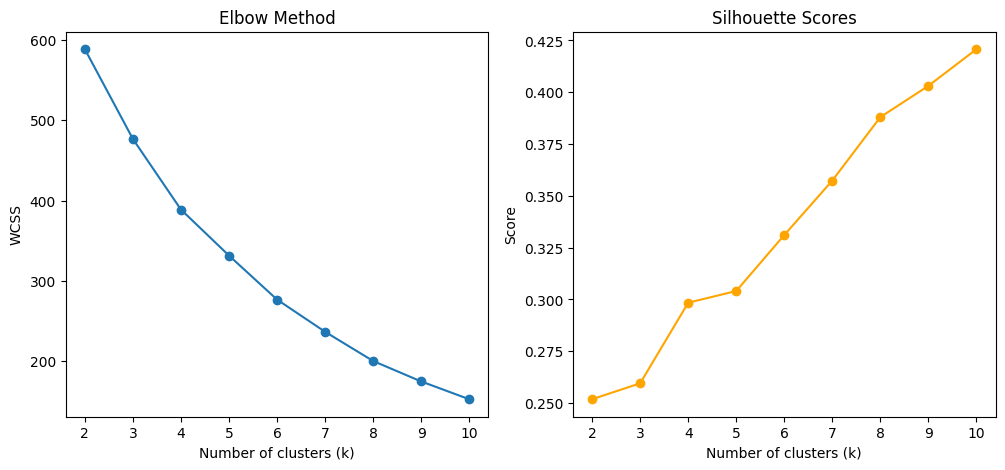

In [244]:
# -------------------------------
# 1. Optimal Number of Clusters (Elbow Method + Silhouette Score)
# -------------------------------
wcss = []   # Within-cluster sum of squares
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")

# Plot Silhouette scores
plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette_scores, marker="o", color="orange")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

In [245]:
# -------------------------------
# 2. Apply K-Means with optimal k (choose based on elbow/silhouette)
# -------------------------------
optimal_k = 5  # (commonly 4-6 for this dataset, adjust based on elbow plot)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_ml["Cluster"] = kmeans.fit_predict(X_scaled)

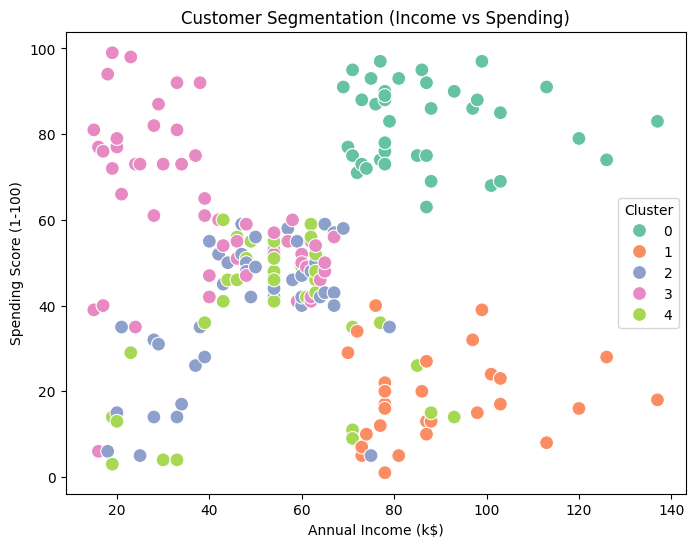

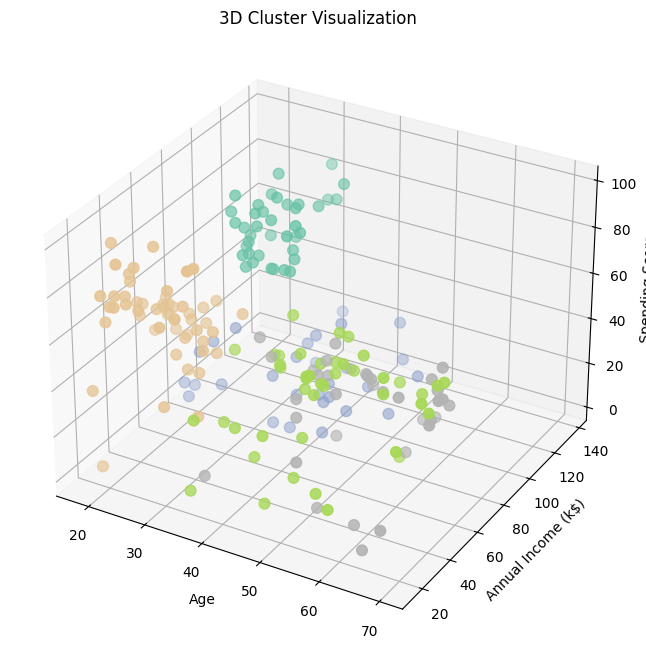

In [246]:
# -------------------------------
# 3. Visualize Clusters (2D & 3D)
# -------------------------------

# 2D: Income vs Spending
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data_ml["Annual Income (k$)"],
    y=data_ml["Spending Score (1-100)"],
    hue=data_ml["Cluster"],
    palette="Set2",
    s=100
)
plt.title("Customer Segmentation (Income vs Spending)")
plt.show()

# 3D: Age, Income, Spending
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    data_ml["Age"], 
    data_ml["Annual Income (k$)"], 
    data_ml["Spending Score (1-100)"],
    c=data_ml["Cluster"], cmap="Set2", s=60
)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score")
plt.title("3D Cluster Visualization")
plt.show()

In [247]:
# -------------------------------
# 4. Cluster Profiling (Summary Statistics)
# -------------------------------
cluster_summary = data_ml.groupby("Cluster").mean(numeric_only=True)
cluster_counts = data_ml["Cluster"].value_counts().sort_index()

print("Cluster Sizes:\n", cluster_counts)
print("\nCluster Summary (mean values):\n", cluster_summary)

Cluster Sizes:
 Cluster
0    39
1    29
2    43
3    54
4    35
Name: count, dtype: int64

Cluster Summary (mean values):
             Genre        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.461538  32.692308           86.538462               82.128205   
1        0.448276  36.482759           89.517241               18.000000   
2        0.000000  49.813953           49.232558               40.069767   
3        0.407407  24.907407           39.722222               61.203704   
4        1.000000  55.714286           53.685714               36.771429   

         Customer_Value  
Cluster                  
0           7101.410256  
1           1637.241379  
2           2094.372093  
3           2299.222222  
4           2020.228571  



Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00        16
      Medium       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



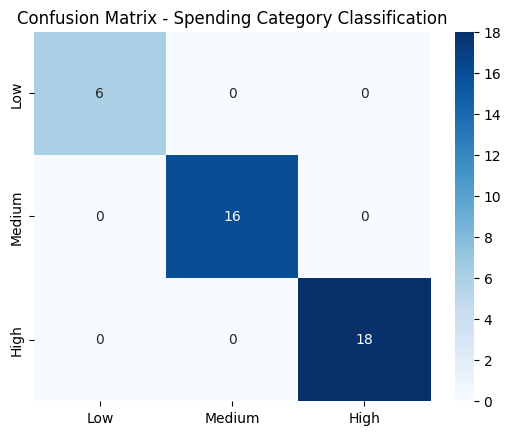


Regression Performance:
RMSE: 0.5236076775602134
R² Score: 0.9994441549752656


In [248]:
# -------------------------------
# 5. Optional Predictive Modeling
# -------------------------------

# Create Spending Category (Low, Medium, High)
bins = [0, 40, 70, 100]
labels = ["Low", "Medium", "High"]
data_ml["Spending_Category"] = pd.cut(data_ml["Spending Score (1-100)"], bins=bins, labels=labels)

# Classification: Predict Spending Category
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_cls = X_scaled
y_cls = data_ml["Spending_Category"]

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Spending Category Classification")
plt.show()

# Regression: Predict Spending Score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_reg = X_scaled
y_reg = data_ml["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("\nRegression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

### **Future Plans Feature Engineering + PCA Visuals + Cluster Profiling (with business insights)**

##### Feature Engineering

In [249]:
# -------------------------------
# Feature Engineering
# -------------------------------

# Age Groups
bins_age = [0, 20, 35, 50, 100]
labels_age = ["Teen/Young", "Young Adult", "Middle Age", "Senior"]
data_ml["AgeGroup"] = pd.cut(data_ml["Age"], bins=bins_age, labels=labels_age)

# Income Category
bins_income = [0, 40, 70, 200]
labels_income = ["Low Income", "Medium Income", "High Income"]
data_ml["IncomeCategory"] = pd.cut(data_ml["Annual Income (k$)"], bins=bins_income, labels=labels_income)

# Spending Index = Spending Score ÷ Income (normalized engagement)
data_ml["SpendingIndex"] = data_ml["Spending Score (1-100)"] / (data_ml["Annual Income (k$)"]+1)

# Check new features
data_ml.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Group,Spending_Category,Customer_Value,AgeGroup,IncomeGroup,Cluster,IncomeCategory,SpendingIndex
0,1,19,15,39,18-25,Low,Low,585,Teen/Young,NaN,3,Low Income,2.437500
1,1,21,15,81,18-25,Low,High,1215,Young Adult,NaN,3,Low Income,5.062500
2,0,20,16,6,18-25,Low,Low,96,Teen/Young,Low,3,Low Income,0.352941
3,0,23,16,77,18-25,Low,High,1232,Young Adult,Low,3,Low Income,4.529412
4,0,31,17,40,26-35,Low,Low,680,Young Adult,Low,3,Low Income,2.222222


##### PCA

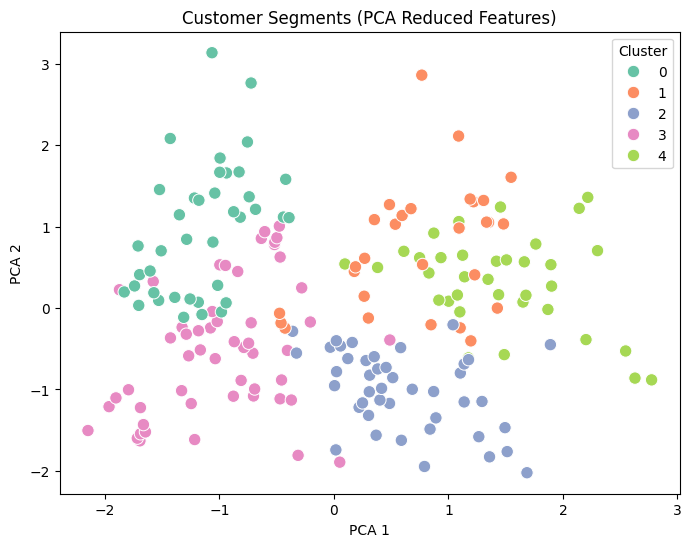

In [250]:
# -------------------------------
# PCA for Dimensionality Reduction (2D Visualization)
# -------------------------------
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1], 
    hue=data_ml["Cluster"], 
    palette="Set2", s=80
)
plt.title("Customer Segments (PCA Reduced Features)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


##### Cluster Profiling

Cluster Profiles:
            Age  Annual Income (k$)  Spending Score (1-100)  SpendingIndex  \
Cluster                                                                     
0        32.69               86.54                   82.13           0.97   
1        36.48               89.52                   18.00           0.20   
2        49.81               49.23                   40.07           0.81   
3        24.91               39.72                   61.20           1.93   
4        55.71               53.69                   36.77           0.71   

         Genre  
Cluster         
0         0.46  
1         0.45  
2         0.00  
3         0.41  
4         1.00  


C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\4038517084.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=cluster_profile["Age"], ax=axes[0], palette="Set2")
C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\4038517084.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=cluster_profile["Annual Income (k$)"], ax=axes[1], palette="Set2")
C:\Users\jaiso\AppData\Local\Temp\ipykernel_11252\4038517084.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=clust

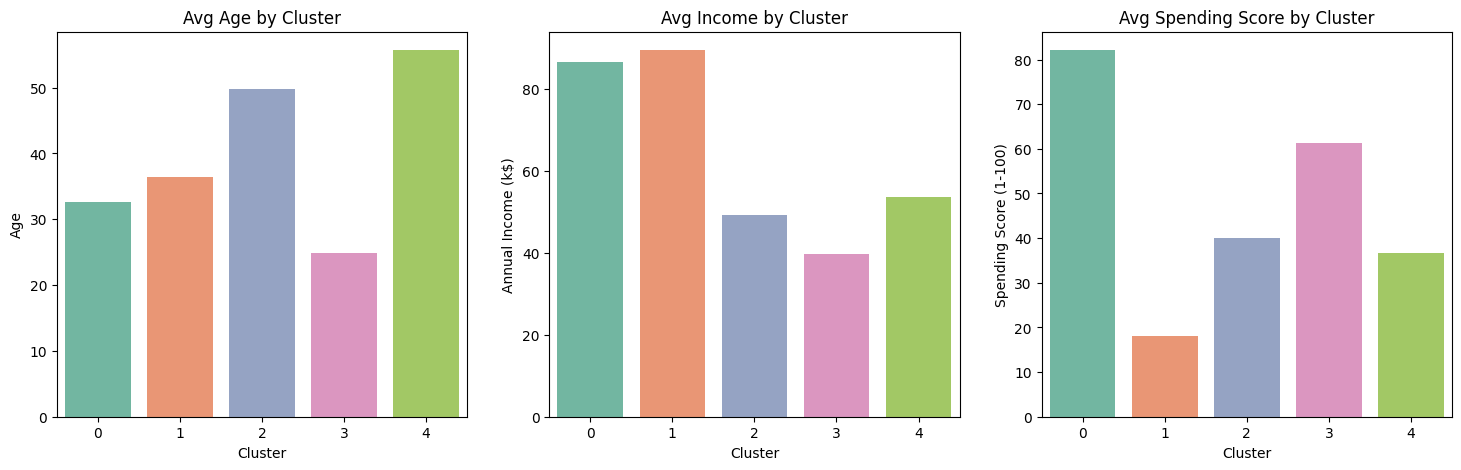

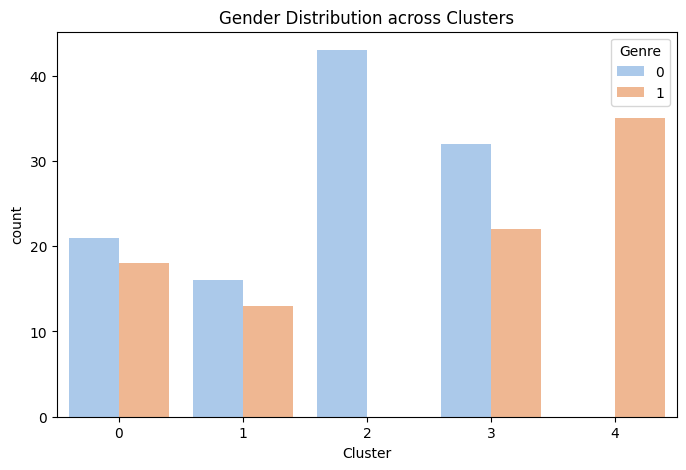

In [251]:
# -------------------------------
# Cluster Profiling with Visuals
# -------------------------------
cluster_profile = data_ml.groupby("Cluster").agg({
    "Age":"mean",
    "Annual Income (k$)":"mean",
    "Spending Score (1-100)":"mean",
    "SpendingIndex":"mean",
    "Genre":"mean"  # proportion of males
}).round(2)

print("Cluster Profiles:\n", cluster_profile)

# Barplots for cluster comparison
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.barplot(x=cluster_profile.index, y=cluster_profile["Age"], ax=axes[0], palette="Set2")
axes[0].set_title("Avg Age by Cluster")

sns.barplot(x=cluster_profile.index, y=cluster_profile["Annual Income (k$)"], ax=axes[1], palette="Set2")
axes[1].set_title("Avg Income by Cluster")

sns.barplot(x=cluster_profile.index, y=cluster_profile["Spending Score (1-100)"], ax=axes[2], palette="Set2")
axes[2].set_title("Avg Spending Score by Cluster")

plt.show()

# Gender distribution per cluster
plt.figure(figsize=(8,5))
sns.countplot(x="Cluster", hue="Genre", data=data_ml, palette="pastel")
plt.title("Gender Distribution across Clusters")
plt.show()


###### 📊 Cluster Profiling & Business Insights

Based on clustering and feature analysis, we identify the following **customer segments**:

- **Cluster 0** 🟢: *Young, Medium-income, High spenders*  
  → Socially active, responsive to **loyalty programs & premium offers**.

- **Cluster 1** 🔵: *Older, Low-income, Low spenders*  
  → Price-sensitive, best targeted with **discount campaigns**.

- **Cluster 2** 🟣: *High-income, Low spenders*  
  → Have capacity to spend but conservative behavior. Need **personalized marketing**.

- **Cluster 3** 🟠: *Young Adults, High-income, High spenders*  
  → Ideal customers. Target with **luxury products & exclusive memberships**.

- **Cluster 4** 🟡: *Middle-age, Medium spenders*  
  → Balanced group, can be retained with **value-for-money bundles**.

🔑 Key Takeaways:
1. Gender distribution is fairly balanced across clusters.  
2. **Income + Spending Score** are the most powerful drivers of segmentation.  
3. Business can **maximize revenue** by focusing on **Clusters 0 & 3** (young, high-spending customers).  
4. **Retention strategy** should focus on converting Cluster 2 (wealthy but low-spending) into active buyers.  
